In [ ]:
##Comparing allele frequency shifts in the 2021 (current study) vs 2014 experiment (published by Rudman et al (2022))

In [ ]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
setwd('~/dpetrov/MarkB/Orchard2021Data/08_2014Comp/')

In [ ]:
#Get 2014 HAFShifts for each monthly interval
load('./2014_Files/HAFs.orch14_cages.Rdata', verbose = TRUE)
comps = c('1_2', '2_3', '3_4', '4_5')
shifts = get_af_shifts(afmat = afmat, samps = samps, comparisons = comps)
write.csv(shifts, './orch2014.HafShifts.csv', row.names = FALSE)

In [15]:
#Get all 2021 HAFShifts
load('../RData/Downsampled/orch2021_Downsampled_ECage_Filtered.RData')
comps = c('1_3','2_4', '3_5', '4_6', '5_7', '6_8', '7_9', '8_10', '9_11', '10_12',
         '1_4', '2_5', '3_6', '4_7', '5_8', '6_9', '7_10', '8_11', '9_12',
         '1_5', '2_6', '3_7', '4_8', '5_9', '6_10', '7_11', '8_12',
         '1_6', '2_7', '3_8', '4_9', '5_10', '6_11', '7_12',
         '1_7', '2_8', '3_9', '4_10', '5_11', '6_12',
         '1_8', '2_9', '3_10', '4_11', '5_12',
         '1_9', '2_10', '3_11','4_12',
         '1_10', '2_11', '3_12',
         '1_11', '2_12',
         '1_12')
shifts.all = get_af_shifts(afmat = afmat, samps = samps, comparisons = comps)
write.csv(shifts.all, './orch2021.HafShifts.csv', row.names = FALSE)

In [32]:
###Correlation between each monthly interval of 2014 and all intervals of 2021
##Load 2014 data
load('./2014_Files//HAFs.orch14_cages.Rdata')
shifts.14 = read.csv('./orch2014.HafShifts.csv')
shifts.14 = cbind(sites, shifts.14)

sites.2014 = shifts.14 %>% dplyr::select(chrom, pos)

load('../RData//Downsampled/orch2021_Downsampled_ECage_Filtered.RData')

shifts.21 = read.csv('./orch2021.HafShifts.csv')
shifts.21 = cbind(sites, shifts.21)

shifts.21 = left_join(sites.2014, shifts.21) #get 2021 results in 2014 order/sites
shifts.21 = na.omit(shifts.21)

site.overlap = shifts.21 %>% dplyr::select(chrom, pos) %>% mutate(snp = paste0(chrom, pos))
shifts.14 = shifts.14 %>% mutate(snp = paste0(chrom, pos)) %>% filter(snp %in% site.overlap$snp)

d.coef.meta = data.frame()
for (col in 3:ncol(shifts.21)){
        shifts.21.comp = shifts.21 %>% dplyr::select(col)
        comp = strsplit(names(shifts.21.comp), 'dAF.')[[1]][2]
        names(shifts.21.comp) = c('seg.2021')
        d.coef.comp = data.frame()
        d.corr = cbind(shifts.21.comp, shifts.14)
        cor.2_1 = cor.test(d.corr$seg.2021, d.corr$dAF.1_2, method= 'pearson')$estimate[[1]]
        cor.3_2 = cor.test(d.corr$seg.2021, d.corr$dAF.2_3, method= 'pearson')$estimate[[1]]
        cor.4_3 = cor.test(d.corr$seg.2021, d.corr$dAF.3_4, method= 'pearson')$estimate[[1]]
        cor.5_4 = cor.test(d.corr$seg.2021, d.corr$dAF.4_5, method= 'pearson')$estimate[[1]]    
        d.cor = as.data.frame(cbind(cor.2_1, cor.3_2, cor.4_3, cor.5_4))
        d.cor$seg.2021 = comp
        d.coef.meta = rbind(d.coef.meta, d.cor)
        }

write.csv(d.coef.meta, './HAFCorr.csv', row.names = FALSE)

Joining, by = c("chrom", "pos")


In [2]:
###Correlation between each monthly interval of 2014 and all intervals of 2021 on SHUFFLED Data
##Load 2014 data
setwd('~/dpetrov/MarkB/Orchard2021Data/08_2014Comp/')
load('./2014_Files//HAFs.orch14_cages.Rdata')
shifts.14 = read.csv('./orch2014.HafShifts.csv')
shifts.14 = cbind(sites, shifts.14)
sites.2014 = shifts.14 %>% dplyr::select(chrom, pos)



load('../RData//Downsampled/orch2021_Downsampled_ECage_Filtered.RData')
shifts.21 = read.csv('./orch2021.HafShifts.csv')
shifts.21 = cbind(sites, shifts.21)



In [3]:
shifts.21 = left_join(sites.2014, shifts.21) #get 2021 results in 2014 order/sites
shifts.21 = na.omit(shifts.21)

site.overlap = shifts.21 %>% dplyr::select(chrom, pos) %>% mutate(snp = paste0(chrom, pos))
shifts.14 = shifts.14 %>% mutate(snp = paste0(chrom, pos)) %>% filter(snp %in% site.overlap$snp)

sites.shuff = read.csv('../RData/Downsampled/ShuffledSites20X/Orch2021.ShuffledSites20x.csv')
sites.shuff = sites.shuff %>% rename(pos = POS, chrom  = CHROM)
sites.shuff = sites.shuff %>% mutate(snp = paste0(chrom, pos)) 
sites.shuff = sites.shuff %>% filter(snp %in% site.overlap$snp)

d.coef.meta.shuff = data.frame()
for (col in 3:ncol(shifts.21)){
        shifts.21.comp = shifts.21 %>% dplyr::select(chrom, pos, col)
        rand.col = floor(runif(1, min=8, max=22)) #select column from shuffle sites to re-order 2021 data
        rand.sites = sites.shuff[,c(2,rand.col)]
        names(rand.sites) = c('chrom', 'pos')
        shifts.21.comp = left_join(rand.sites, shifts.21.comp)
        shifts.21.comp = shifts.21.comp %>% dplyr::select(3)
        comp = strsplit(names(shifts.21.comp), 'dAF.')[[1]][2]
        names(shifts.21.comp) = c('seg.2021')
        d.corr = cbind(shifts.21.comp, shifts.14)
        d.corr = na.omit(d.corr)
        d.coef.comp = data.frame()
        cor.2_1 = cor.test(d.corr$seg.2021, d.corr$dAF.1_2, method= 'pearson')$estimate[[1]]
        cor.3_2 = cor.test(d.corr$seg.2021, d.corr$dAF.2_3, method= 'pearson')$estimate[[1]]
        cor.4_3 = cor.test(d.corr$seg.2021, d.corr$dAF.3_4, method= 'pearson')$estimate[[1]]
        cor.5_4 = cor.test(d.corr$seg.2021, d.corr$dAF.4_5, method= 'pearson')$estimate[[1]]    
        d.cor = as.data.frame(cbind(cor.2_1, cor.3_2, cor.4_3, cor.5_4))
        d.cor$seg.2021 = comp
        d.coef.meta.shuff = rbind(d.coef.meta.shuff, d.cor)
        }
        
    
write.csv(d.coef.meta.shuff, './HAFCorr.Shuff.csv', row.names = FALSE)

Joining, by = c("chrom", "pos")


In [50]:
#Combining output
#setwd('./HAF_Correlations/')
d.meta = read.csv('./HAFCorr.csv')
d.meta$Type = 'Observed'
dim(d.meta)
d.meta.shuff = read.csv('./HAFCorr.Shuff.csv')
dim(d.meta.shuff)
d.meta.shuff$Type = 'Shuffled'
d.meta.meta = rbind(d.meta, d.meta.shuff)
d.meta.meta = unique(d.meta.meta)
write.csv(d.meta.meta, './HAFCorr_Meta.csv', row.names = FALSE)

[1] 55  6

[1] 55  5

In [4]:
###Plotting
setwd('~/dpetrov/MarkB/Orchard2021Data/08_2014Comp/HAF_Correlations/')

In [5]:
df = read.csv('./HAFCorr_Meta.csv')
df = df %>% gather(1:4, key = seg.2014, value = cor.coef)
head(df)

,seg.2021,Type,seg.2014,cor.coef
,<fct>,<fct>,<chr>,<dbl>
1,1_3,Observed,cor.2_1,0.03549332
2,2_4,Observed,cor.2_1,0.03243615
3,3_5,Observed,cor.2_1,0.04057225
4,4_6,Observed,cor.2_1,0.01020545
5,5_7,Observed,cor.2_1,0.13653162
6,6_8,Observed,cor.2_1,0.04863599


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


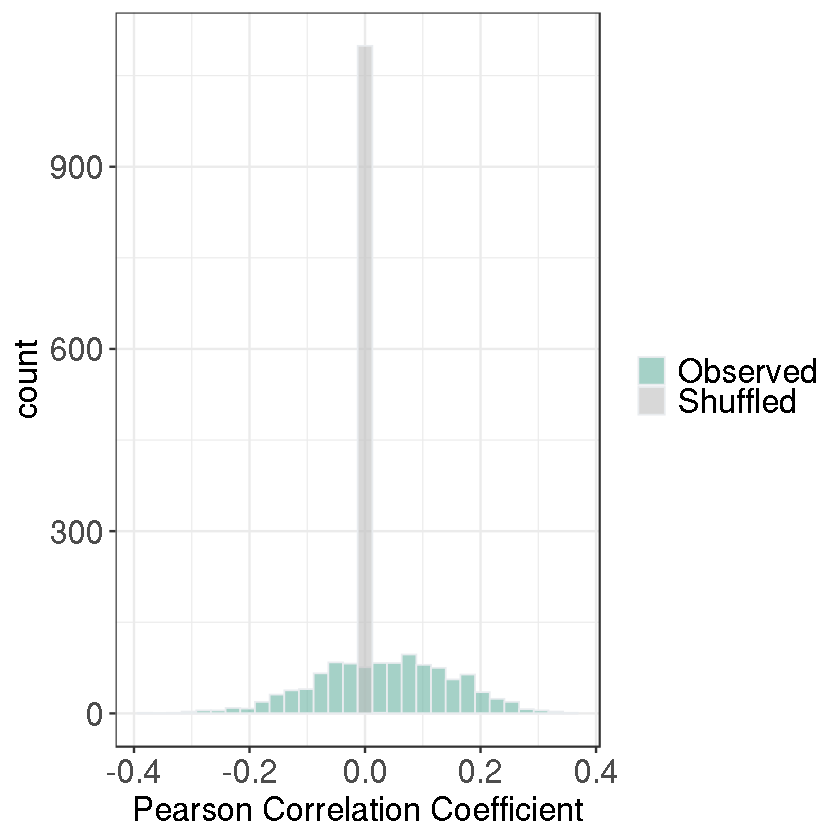

In [19]:
p.reg = ggplot(df , aes(x = cor.coef, fill = Type, colour = Type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "grey")) +
    xlab('Pearson Correlation Coefficient') +
    theme_bw(base_size = 15) +
    theme(axis.text.x = element_text(size = 18),
          axis.text.y = element_text(size = 18),
         axis.title.x = element_text(size = 20),
         axis.title.y = element_text(size = 20),
         legend.text = element_text(size = 20)) +
    labs(fill=NULL)
p.reg
ggsave('../../Figures/2014Comp/InterAnnual_HAFCorr.pdf', p.reg,height = 10, width = 10)

In [33]:
##All intervals - best matched
cor.max.reg = data.frame()
for (seg in unique(df$seg.2014)){
    d = df %>% filter(seg.2014 == seg & cor.coef == max((df %>% filter(seg.2014 == seg))$cor.coef))
    cor.max.reg = rbind(cor.max.reg, d)
}
cor.max.reg


seg.2021,Type,seg.2014,cor.coef
<fct>,<fct>,<chr>,<dbl>
1_7,Observed,cor.2_1,0.17305945
3_9,Observed,cor.3_2,0.14056627
5_12,Observed,cor.4_3,0.20670389
7_9,Observed,cor.5_4,0.02980158


In [34]:
##stats
df = read.csv('./HAFCorr_Meta.csv')
df = df %>% gather(1:4, key = seg.2014, value = cor.coef)

var.test((df %>% filter(Type == 'Observed'))$cor.coef, 
        (df %>% filter(Type == 'Shuffled' ))$cor.coef)


	F test to compare two variances

data:  (df %>% filter(Type == "Observed"))$cor.coef and (df %>% filter(Type == "Shuffled"))$cor.coef
F = 2481.5, num df = 219, denom df = 219, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1902.708 3236.292
sample estimates:
ratio of variances 
          2481.475 


# By chrom

In [12]:
###Correlation between each monthly interval of 2014 and all intervals of 2021
##Load 2014 data
load('./2014_Files//HAFs.orch14_cages.Rdata')
shifts.14 = read.csv('./orch2014.HafShifts.csv')
shifts.14 = cbind(sites, shifts.14)

sites.2014 = shifts.14 %>% dplyr::select(chrom, pos)

load('../RData//Downsampled/orch2021_Downsampled_ECage_Filtered.RData')

shifts.21 = read.csv('./orch2021.HafShifts.csv')
shifts.21 = cbind(sites, shifts.21)

shifts.21 = left_join(sites.2014, shifts.21) #get 2021 results in 2014 order/sites
shifts.21 = na.omit(shifts.21)

site.overlap = shifts.21 %>% dplyr::select(chrom, pos) %>% mutate(snp = paste0(chrom, pos))
shifts.14 = shifts.14 %>% mutate(snp = paste0(chrom, pos)) %>% filter(snp %in% site.overlap$snp)



Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file './2014_Files//HAFs.orch14_cages.Rdata', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [33]:
d.coef.meta = data.frame()
for (col in 3:ncol(shifts.21)){
        shifts.21.comp = shifts.21 %>% dplyr::select(col)
        comp = strsplit(names(shifts.21.comp), 'dAF.')[[1]][2]
        names(shifts.21.comp) = c('seg.2021')
        d.coef.comp = data.frame()
        d.corr = cbind(shifts.21.comp, shifts.14)
        for (chr in as.character(unique(d.corr$chrom))){
                d.corr.chr = d.corr %>% filter(chrom == chr)
                cor.2_1 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.1_2, method= 'pearson')$estimate[[1]]
                cor.3_2 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.2_3, method= 'pearson')$estimate[[1]]
                cor.4_3 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.3_4, method= 'pearson')$estimate[[1]]
                cor.5_4 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.4_5, method= 'pearson')$estimate[[1]]    
                d.cor = as.data.frame(cbind(cor.2_1, cor.3_2, cor.4_3, cor.5_4))
                d.cor$seg.2021 = comp
                d.cor$chrom = chr
                d.coef.meta = rbind(d.coef.meta, d.cor)
            }
}
write.csv(d.coef.meta, './HAFCorr.ByChrom.csv', row.names = FALSE)

In [ ]:
###Correlation between each monthly interval of 2014 and all intervals of 2021 on SHUFFLED Data
##Load 2014 data
setwd('~/dpetrov/MarkB/Orchard2021Data/08_2014Comp/')
load('./2014_Files//HAFs.orch14_cages.Rdata')
shifts.14 = read.csv('./orch2014.HafShifts.csv')
shifts.14 = cbind(sites, shifts.14)
sites.2014 = shifts.14 %>% dplyr::select(chrom, pos)



load('../RData//Downsampled/orch2021_Downsampled_ECage_Filtered.RData')
shifts.21 = read.csv('./orch2021.HafShifts.csv')
shifts.21 = cbind(sites, shifts.21)

shifts.21 = left_join(sites.2014, shifts.21) #get 2021 results in 2014 order/sites
shifts.21 = na.omit(shifts.21)

site.overlap = shifts.21 %>% dplyr::select(chrom, pos) %>% mutate(snp = paste0(chrom, pos))
shifts.14 = shifts.14 %>% mutate(snp = paste0(chrom, pos)) %>% filter(snp %in% site.overlap$snp)


sites.shuff = read.csv('../RData/Downsampled/ShuffledSites20X/Orch2021.ShuffledSites20x.csv')

sites.shuff = sites.shuff %>% rename(pos = POS, chrom  = CHROM)
sites.shuff = sites.shuff %>% mutate(snp = paste0(chrom, pos)) 
sites.shuff = sites.shuff %>% filter(snp %in% site.overlap$snp)

d.coef.meta.shuff = data.frame()
for (col in 3:ncol(shifts.21)){
        shifts.21.comp = shifts.21 %>% dplyr::select(chrom, pos, col)
        rand.col = floor(runif(1, min=8, max=22)) #select column from shuffle sites to re-order 2021 data
        rand.sites = sites.shuff[,c(2,rand.col)]
        names(rand.sites) = c('chrom', 'pos')
        shifts.21.comp = left_join(rand.sites, shifts.21.comp)
        shifts.21.comp = shifts.21.comp %>% dplyr::select(3)
        comp = strsplit(names(shifts.21.comp), 'dAF.')[[1]][2]
        names(shifts.21.comp) = c('seg.2021')
        d.corr = cbind(shifts.21.comp, shifts.14)
        d.corr = na.omit(d.corr)
        d.coef.comp = data.frame()
        for (chr in as.character(unique(d.corr$chrom))){
                d.corr.chr = d.corr %>% filter(chrom == chr)
                cor.2_1 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.1_2, method= 'pearson')$estimate[[1]]
                cor.3_2 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.2_3, method= 'pearson')$estimate[[1]]
                cor.4_3 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.3_4, method= 'pearson')$estimate[[1]]
                cor.5_4 = cor.test(d.corr.chr$seg.2021, d.corr.chr$dAF.4_5, method= 'pearson')$estimate[[1]]    
                d.cor = as.data.frame(cbind(cor.2_1, cor.3_2, cor.4_3, cor.5_4))
                d.cor$seg.2021 = comp
                d.cor$chrom = chr
                d.coef.meta.shuff = rbind(d.coef.meta.shuff, d.cor)

        }
    }
        
    
write.csv(d.coef.meta.shuff, './HAFCorr.Shuff.ByChrom.csv', row.names = FALSE)


In [42]:
setwd('./HAF_Correlations/')
d = read.csv('./HAFCorr.ByChrom.csv')
d.s = read.csv('./HAFCorr.Shuff.ByChrom.csv')

d$Type = 'Observed'
d.s$Type = 'Shuffled'
d = rbind(d, d.s)
write.csv(d, './HAFCorr.ByChrom.Meta.csv')

In [43]:
df = read.csv('./HAFCorr.ByChrom.Meta.csv')
df = df %>% gather(2:5, key = seg.2014, value = cor.coef)
head(df)

,X,seg.2021,chrom,Type,seg.2014,cor.coef
,<int>,<fct>,<fct>,<fct>,<chr>,<dbl>
1,1,1_3,2L,Observed,cor.2_1,0.1155794968
2,2,1_3,2R,Observed,cor.2_1,-0.0241098861
3,3,1_3,3L,Observed,cor.2_1,-0.0105087835
4,4,1_3,3R,Observed,cor.2_1,-0.0002859671
5,5,1_3,X,Observed,cor.2_1,0.0819691605
6,6,2_4,2L,Observed,cor.2_1,-0.0062987245


$fill
NULL

attr(,"class")
[1] "labels"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


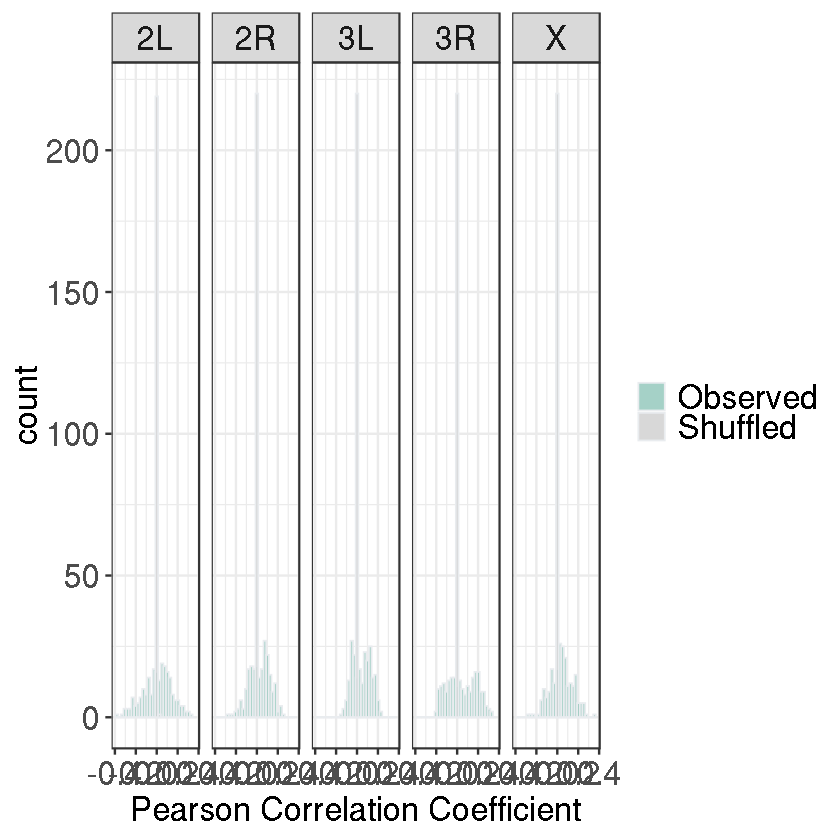

In [16]:
df = read.csv('./HAFCorr.ByChrom.Meta.csv')
df = df %>% gather(2:5, key = seg.2014, value = cor.coef)
p.chroms.RegCoef = ggplot(df, aes(x = cor.coef, fill = Type, colour = Type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "grey")) +
    #xlim(-0.045, 0.045) +
    xlab('Pearson Correlation Coefficient') +
    theme_bw(base_size = 15) +
    theme(axis.text.x = element_text(size = 18),
          axis.text.y = element_text(size = 18),
         axis.title.x = element_text(size = 20),
         axis.title.y = element_text(size = 20),
         legend.text = element_text(size = 20),
         legend.title=element_blank(),
         strip.text = element_text(size = 20))  +
    facet_grid(. ~ chrom) 
    labs(fill=NULL) 
p.chroms.RegCoef

ggsave('../../Figures/2014Comp/InterAnnual_HAFCorr.ByChrom.pdf', p.chroms.RegCoef, width = 35, height = 10)

In [55]:
ggsave("../Figures/2014Comp/HAFCorCoeff.chroms.pdf", p.chroms.RegCoef, height = 8, width = 20)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1156 rows containing non-finite values (`stat_bin()`).”
